In [44]:
# Author: Shelly Hashali Kurera Warnakulasooriya (17043308)
# Created: 31/01/2020
# Revised: 04/04/2020
# Description: Application of Sentiment Analysis for Product Reviews. The dataset was retrieved from Kaggle and is based on Amazon manufactured products.
# Link to view the dataset used to build the model: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products
# Coding: UTF-8

# 1 Application of Sentiment Analysis on product reviews
As the number of products being sold online increases, it is becoming progressively difficult for customers to make 
purchasing decisions. Furthermore, everyday millions of reviews are generated in the Internet. Sentiment analysis allows 
to process the information efficiently and cost-effectively. This application will apply Sentiment Analysis techniques 
to identify and extract information from reviews in order to provide insights on how customers feel about products and/or services. 
This key data can be used to provide a more reliable insight on the quality of the product and customer satisfaction, 
moreover it could be utilized to develop innovative ideas for new product designs and enhancements with more appealing 
requirements from the consumer viewpoint.

Questions:
- Does the frequency of reviews on a product detect its quality, whether it is superior or mediocre compares to its competitors?
- **Is it possible to associate positive and negative words/sentiments for each product in the catalog?**
- By implementing Sentiment analysis, is it feasible to predict scores for reviews based on the presence of specific words?

Assumptions made throughout the implementation:
- A dataset size of around 30K examples has been considered adequate to represent the entire population of reviews.
- The content presented in the text reviews of each product has been considered to be prolific to train a sentiment analysis classifier with an accuracy over 80%.

# 2 Insight on the raw data retrieved

In [45]:
# Importing the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Specifying warning to be ignored
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
# Plotting style
sns.set_style("whitegrid")
%matplotlib inline 
# Seeding random number generator
np.random.seed(7)

# Reading csv file and viewing of first five rows
csv = "amazon_reviews.csv"
df = pd.read_csv(csv)
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


- The sentiment analysis refinement can be performed with the review text or with the actual rating of the recommendation of the product. 
- It would also be feasible to label each review based on the sentiment expressed through the title, which could possibly 
contain positive or negative information regarding the review.

In [46]:
# Calculating descriptive statistics of the dataframe
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based upon the descriptive statistics shown above, the following information can be retrieved:
- The average review score is 4.58 having, however, a low standard deviation.
    - The data is spread out around the average score.
- From the second quartile onwards most reviews are positive.
- The average number of helpful reviews is 0.63, having a high standard deviation.
    - For most reviews, the range of helpfulness is between 0 to 13 users considering useful the information given.
    - The review considered most helpful by the users counted the opinion of 814 people.

In [47]:
# Displaying data information (columns, number of values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Based upon the information given above:
- The columns reviews.userCity, reviews.userProvince, reviews.id, and reviews.didPurchase will be dropped, they will be 
considered only for exploratory analysis since they present floats.
- Not every column has the maximum number of entry points in comparison to the total number of entries.
- The column reviews.text has the minimum missing information (provides 34659 entries on a total of 34660).
- The name column is missing 6760 values, meaning that the ASINs value should be referenced instead of it.
- For comprehension, it is important to explain that ASINs are unique 10-character alphanumeric identifiers assigned by 
Amazon for product identification.

In [48]:
# Finding unique ASINs
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [49]:
# Counting the number of unique ASINs
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


**Visualizing the distributions of numerical variables:**

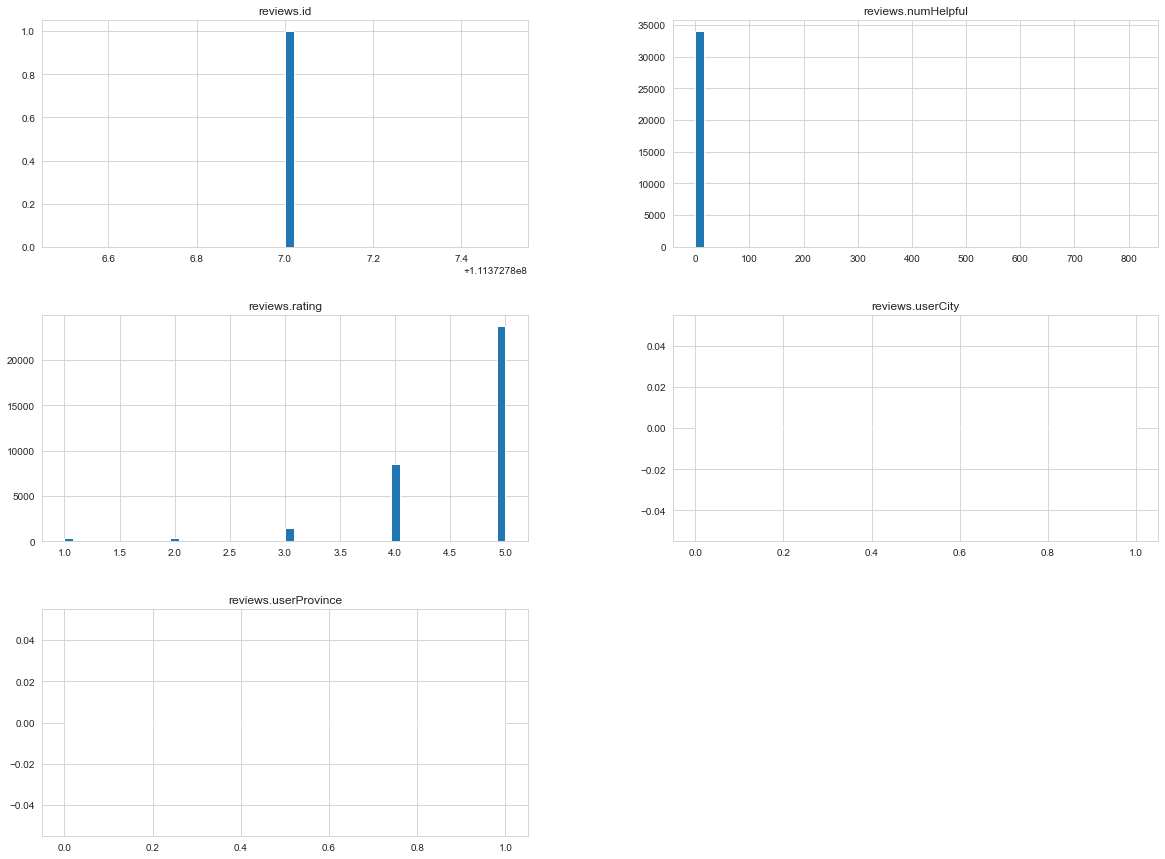

In [50]:
# Building histogram by setting the number of bins and fig size (width and height)
data.hist(bins=50, figsize=(20,15))
# Visualizing the distributions of numerical variables:
plt.show()

Based on the distributions shown above:
- Regarding the helpfulness, outliers are considered valuable, it may be important to weight reviews that had more than 50+ people considering it useful.
- Regarding the rating, the vast majority of the entries were rated highly. The amount of 5 star ratings is double the amount of the other ratings combined.

# 3 Splitting dataset for Training and Testing

- Before exploring the dataset, the sample is going to be split into training and testing for the sentiment analysis classifier.
- A stratified split will be done on the review score to ensure balanced data due to the fact that the majority of reviews are positive.
- In order to utilize Scikit-learn's `Stratified ShuffleSplit` class, all the reviews that are missing information (NaN) in rating scores
will be removed. Subsequently, all the review scores will be converted to `integer` datatype.

In [51]:
# Removing reviews that are missing information in rating scores
from sklearn.model_selection import StratifiedShuffleSplit
print("Before removing NaN values {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After removing NaN values {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before removing NaN values 34660
After removing NaN values 34627


In [52]:
# Splitting dataset into training and testing for the sentiment analysis classifier
# A stratified split is done on the review score to ensure balanced data due to the fact that the majority of reviews
# are positive
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

**Checking to ensure training and testing sets have been stratified proportionately in comparison to the raw data.**

In [53]:
# Displaying size of training set
len(strat_train)

27701

In [54]:
# Counting values based on the review scores column to ensure proportionate stratification of the raw data
strat_train["reviews.rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5.0    0.685174
4.0    0.247031
3.0    0.043500
2.0    0.011696
1.0    0.011588
Name: reviews.rating, dtype: float64

In [55]:
# Displaying size of testing set
len(strat_test)

6926

In [56]:
# Counting values based on the review scores column to ensure proportionate stratification of the raw data
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.689864
4.0    0.244730
3.0    0.042160
1.0    0.011406
2.0    0.011118
Name: reviews.rating, dtype: float64

# 4 Exploration of data on training sample

In [57]:
reviews = strat_train.copy()
# Viewing first five rows of training set
reviews.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno
28775,AVpidLjVilAPnD_xEVpI,NaN,B0189XYY0Q,Amazon Fire,"Electronics,Tablets & E-Readers,Tablets,Back T...","841667101743,amazonfire/51441641,amazonfirehd1...",Amazon,2017-03-11T00:00:00.000Z,NaN,"2017-09-03T08:45:20.825Z,2017-08-27T11:01:01.1...",...,False,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5386601/review...,This is my 3rd Kindle. I have continued to mov...,My 3rd Kindle,NaN,NaN,Sunshine
1136,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-02-04T00:00:00.000Z,2017-05-21T05:56:10Z,"2017-04-30T00:42:00.000Z,2017-06-07T09:04:00.000Z",...,True,NaN,1.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,enjoying reading via the device; lots of optio...,easy to use; a little heavy to hold,NaN,NaN,bird
17803,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2015-10-22T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:34:06.437Z,2017-08-02T19:49:50.3...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/9439005/review...,"If you want an e book reader that is light, ea...",As an e reader this is great!,NaN,NaN,Thomas


For the exploratory insight the following columns will be examined:
- ASINs
- name
- rating score
- recommendation score

## 4.1 Analysing names and ASINs

In [58]:
# Viewing the number of product names and ASINs
len(reviews["name"].unique()), len(reviews["asins"].unique())

(47, 35)

In [59]:
# Viewing summary of the training data for exploratory analysis of the data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

Elaboration of a hypothesis: there are only 35 products based on the training data ASINs
- Each ASIN is correlated to one product, but might have multiple product names (one-to-many relationship).
- A single ASIN can have many names due to different vendor listings. Moreover, there could also be a lot of missing names 
or more names with slight variations in title (i.e. GB VS 8 GB, NaN for product names).

In [60]:
# Grouping by ASINs and name
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Paperwhite,,,\r\nKindle Paperwhite,,,,...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

<u>Important Consideration</u>: 34 ASINs are presents due to the fact that one product has been provided with two ASINs.

In [61]:
# Viewing the multiple names for the specific product.
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red

In [62]:
# Counting the number of times the multiple names appear in the dataset for the specific product.
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2318
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2029
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           259
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           106
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

**The information provided confirms the hypothesis that each ASIN can have multiple names. This notion highlights the 
importance of focusing on ASINs rather than product names.**

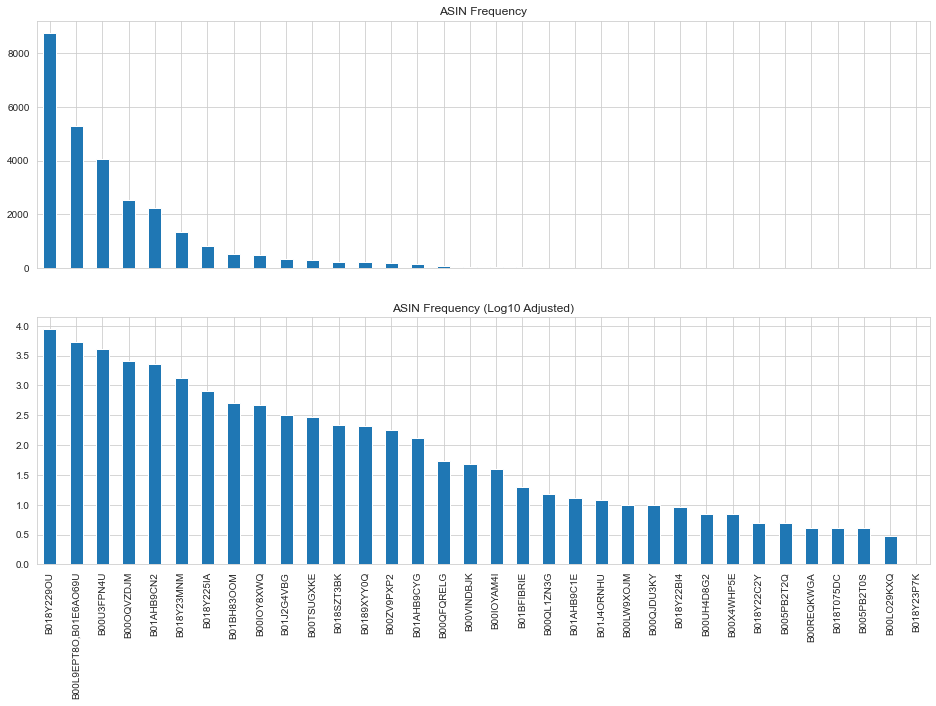

In [63]:
# Displaying bar plot based on ASIN Frequency
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

- Based on the bar graph for ASINs, certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products.
- The "right tailed" distribution of ASINs suggest that certain products have higher sales, which is correlated to the higher ASINs frequencies in the reviews.
- The distribution follows a "right tailed" distribution even when adopting the log of the ASINs to normalize the data in order to portray an in-depth picture of each ASIN.

**This proves that certain ASINs (products) have better sales than others presenting lower sales. Such knowledge could be used to dictates which products should be kept or removed.**

## 4.2 Analysing rating scores and ASINs frequency

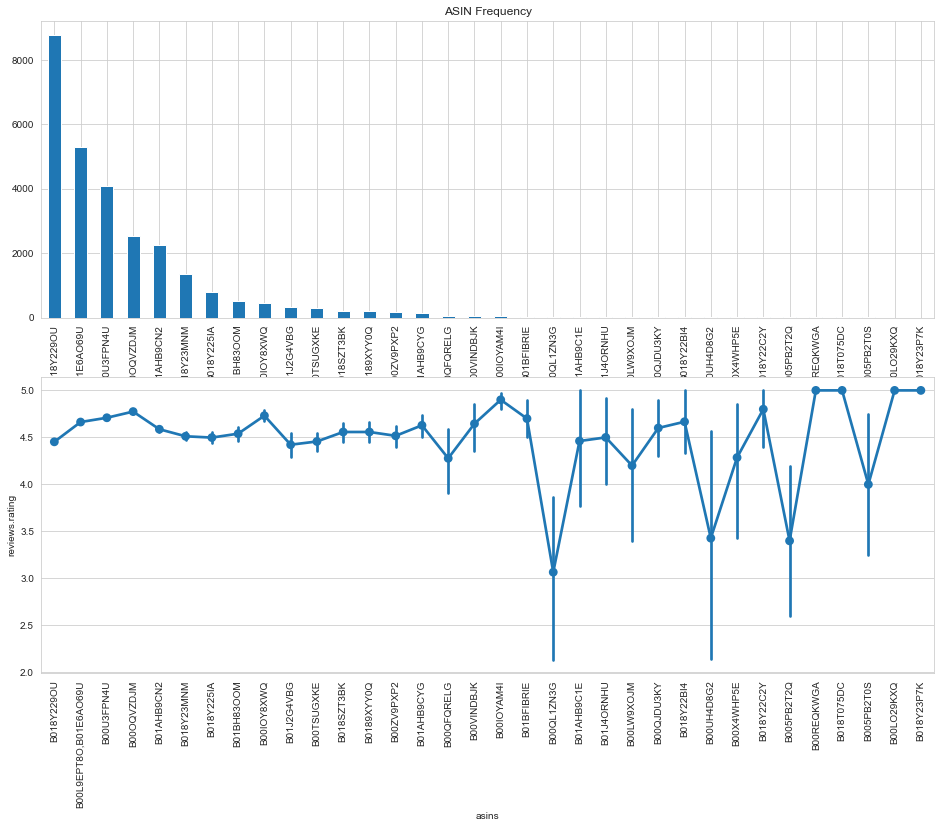

In [64]:
# Calculating average rating for the entire training dataset
reviews["reviews.rating"].mean()

# Displaying point-plot graph for the average review ratings of each ASIN
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

Observations:
- The most frequently reviewed products have their average review ratings in the range between 4.5 and 4.8 range with little variance.
- The first 4 set of ASINs present a slightly inverse relationship between the ASIN frequency level and the average review rating scores. This relationship, however, is not significant due to the fact that the average rating for the first 4 ASINs is still in the range between 4.5 and 4.8, which is considerably good.
- The corresponding average review rating scores, shown on the point-plot graph, for the ASINs with lower frequencies, displayed on the bar graph, have a distinctive higher variance, demonstrated by the length of the vertical lines. The lower frequencies of such ASINs may indicate a lower quality of products. Due to their high variance, the average ratings for ASINs with lower frequencies are not significant for the analysis.
- Lastly, the last 4 product ASINs have no variance due to their significantly low frequencies, even though the review rating score corresponds to 5.0.

**<u>Note</u>The point-plot graph automatically takes the average of the rating score data.**

## 4.3 Analysing recommendation scores and ASINs frequency

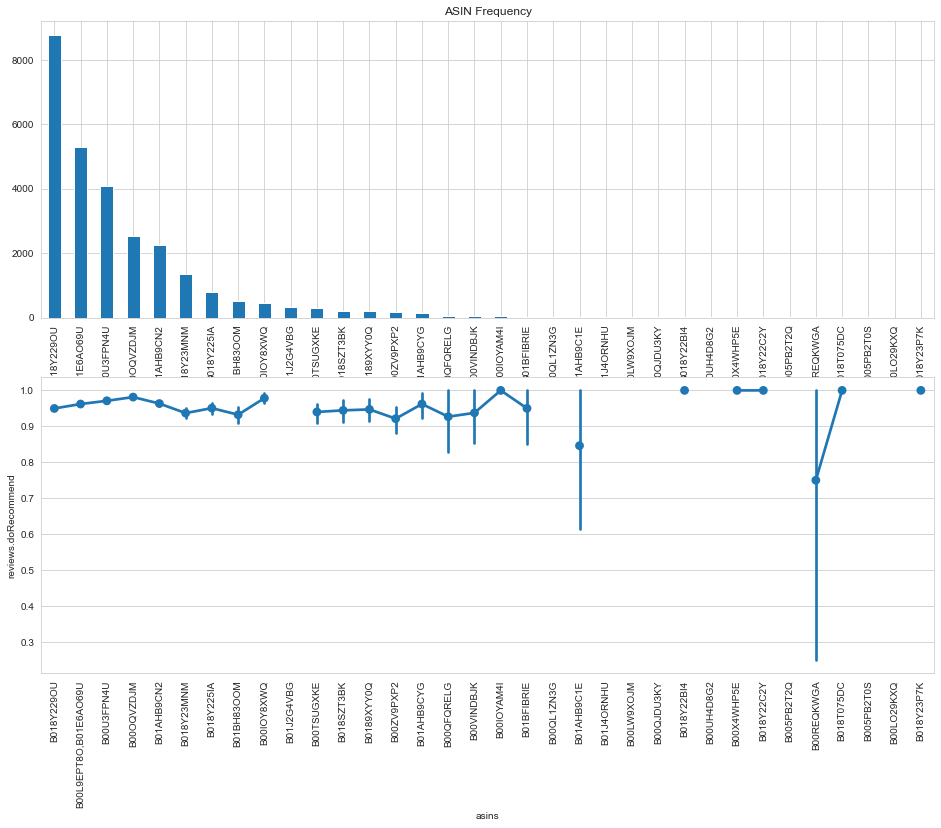

In [65]:
# Displaying point-plot graph for the product recommendations of each ASIN
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show() 

- From the above analysis, the first 19 ASINs are recommended by consumers, this information is consistent with the rating scores as they present values in the range between 4.0 and 5.0.
- Regarding the remaining ASINs, they present fluctuating results due to the lower sample size.

**<u>Note</u>: The textual content of the reviews is analyzed in the SA classifier.**

# 5 Correlation matrix

In [66]:
# Correlation matrix to analyze reviews ratings with ASINs
corr_matrix = reviews.corr()
corr_matrix


,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04372,NaN,NaN
reviews.rating,NaN,-0.04372,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [67]:
# Viewing summary of the training data for exploratory analysis of the data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

In [68]:
# Counting the number of reviews for each ASIN and displaying information
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8772
"B00L9EPT8O,B01E6AO69U",5304
B00U3FPN4U,4076
B00OQVZDJM,2525
B01AHB9CN2,2241


In [69]:
# Calculating average rating for each ASIN and displaying information
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00IOY8XWQ,4.731183
B00IOYAM4I,4.900000
"B00L9EPT8O,B01E6AO69U",4.663462


In [70]:
# Joining previous results into one table and displaying information
table = counts.join(avg_rating)
table.head(20)

,asins,reviews.rating
B018Y229OU,8772,4.453032
"B00L9EPT8O,B01E6AO69U",5304,4.663462
B00U3FPN4U,4076,4.709028
B00OQVZDJM,2525,4.774653
B01AHB9CN2,2241,4.586792
B018Y23MNM,1346,4.511887
B018Y225IA,811,4.498150
B01BH83OOM,504,4.539683
B00IOY8XWQ,465,4.731183
B01J2G4VBG,322,4.422360


,asins,reviews.rating
asins,1.000000,0.099791
reviews.rating,0.099791,1.000000


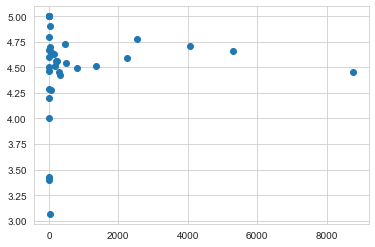

In [71]:
# Displaying scatter plot of the joined table
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

From the analysis in data exploration between the ASINs and the rating scores, it was discovered the presence of many products with low occurrence having a high variance. The low occurring ASINs are considered not significant due to the low sample size.
<br>

# 6 Sentiment Analysis

Using the features provided, the aim is to build a classifier that can determine a review's sentiment.

## 6.1 Setting Target Variable (Sentiments)

Segregate ratings from 1-5 into positive, neutral, and negative.

In [72]:
# Segregating ratings from 1-5 into positive, neutral and negative
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
    
# Applying sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

4349     Positive
30776    Positive
28775     Neutral
1136     Positive
17803    Positive
7336     Positive
32638    Positive
13995    Positive
6728     Negative
22009    Positive
11047    Positive
22754    Positive
5578     Positive
11673    Positive
19168    Positive
14903    Positive
30843    Positive
5440     Positive
28940    Positive
31258    Positive
Name: Sentiment, dtype: object

In [73]:
# Preparing data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
# Showing training and testing sample dimension
print(len(X_train), len(X_test))

27701 6926


27,701 training samples and 6926 testing samples.

## 6.2 Extract Features

Here we will turn the textual content of the reviews into numerical feature vectors using the **Bag of Words** strategy:
- Assign fixed integer id to each word occurrence (integer indices to build a word occurrence dictionary)
- X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (the training set)
<br>
<br>

In order to implement the **Bag of Words** strategy, SciKit-Learn's **CountVectorizer** is utilised to perform the following:
- Text pre-processing:
    - Tokenization (breaking sentences into words)
    - Stopwords (filtering "the", "are", etc)
- Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
- Feature Vector (converts the dictionary of text documents into a feature vector)

In [74]:
# Replacing "NaN" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Extracting features vectors with the Bag of Words strategy using SciKit-Learn CountVectorizer for text preprocessing
# and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12526)

The training set is made of 27,701 entries and 12,526 distinct words have been detected in the set.


Furthermore, longer documents typically present a higher average count value on words that are not much informative, dominating shorter documents that present lower average counts with same frequencies.
For the following reason, **TfidfTransformer** is utilised to reduce the redundancy:
- Term Frequencies (**Tf**) divides number of occurrences for each word by total number of words
- Term Frequencies times Inverse Document Frequency (**Tfidf**) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)

In [75]:
# Transforming count matrix to a normalized tf representation in order to scale down the impact of tokens that occur
# more frequently but that are less informative than features that occur in a small friction
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12526)

## 6.3 Building a Pipeline from the Extracted Features

**Multinominal Naive Bayes** Classifier
- Multinominal Niave Bayes is considered the most suitable for word counts where data are typically represented as **word vector counts** (number of times outcome number X[i,j] is observed over the number of trials), while also ignoring non-occurrences of a feature i
- Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed to be conditionally independent to each other, P(x|y) where x is the feature and y is the classifier

In [76]:
# Building a Multinomial Naive Bayes Classifier from the extracted features
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_nominalNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## 6.4 Test Model

In [77]:
import numpy as np
# Testing Multinomial Naive Bayes Classifier and displaying accuracy
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9344498989315623

The Multinomial Naive Bayes Classifier presents a 93.45% accuracy level based on the features. 
<br>
<br>
Subsequently, other classifiers will be tested and the best models will be fine tuned to avoid over-fitting.


## 6.5 Testing Other Models

**Logistic Regression Classifier**

In [78]:
# Building a Logistic Regression Classifier from the extracted features
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
# Testing Logistic Regression Classifier and displaying accuracy
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9392145538550389

**Support Vector Machine Classifier**

In [79]:
# Building a Support Vector Machine Classifier from the extracted features
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

# Testing Support Vector Machine Classifier and displaying accuracy
predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9393589373375686

**Decision Tree Classifier**

In [80]:
# Building a Decision Tree Classifier from the extracted features
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

# Testing Decision Tree Classifier and displaying accuracy
predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.9016748483973434

**Random Forest Classifier**

In [81]:
# Building a Random Forest Classifier from the extracted features
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

# Testing Random Forest Classifier and displaying accuracy
predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9350274328616807

The perfomance of the various models is very high (>90%). The **Support Vector Machine Classifier** will be utilised to fine tune, since it has the highest accuracy level of **93.94%**.
<br>

## 6.6 Fine tuning the Support Vector Machine Classifier

- A **Grid Search** of the best parameters is run on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer).
- The grid search is also run with LinearSVC classifier pipeline, parameters and cpu core maximization.
- The grid search is then applied to the training data set.
- The fine tuned classifier is then tested on arbitrary reviews and on the testing dataset to retrieve the accuracy.

**Support Vector Machines** are considered to be very suitable for classification problems by measuring extreme values between classes in order to differentiate the worst case scenarios, enabling the classification between Positive, Neutral and Negative correctly.

In [82]:
# Fine tuning the Support Vector Machine Classifier running a Grid Search of the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
# Running Grid Search with LinearSVC classifier pipeline, parameters and cpu core maximization
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]

Positive    NaN
Neutral     NaN
Negative    NaN
Name: Sentiment, dtype: object

In [83]:
# Testing on arbitrary reviews and displaying accuracy
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9408027721628646

**Results:**
- After testing on arbitrary reviews, the features are performing correctly with Positive, Neutral, Negative results
- After running the grid search, the Support Vector Machine Classifier has improved to **94.08%** in accuracy.

## 6.7 Detailed Performance Analysis of Support Vector Machine Classifier

For detailed analysis, we will:
- Analyze the best mean score of the grid search (classifier, parameters, CPU core)
- Analyze the best estimator
- Analyze the best parameter

In [84]:
# Detailed performance analysis of Support Vector Machine Classifier
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9366809937342697
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_sca

- The best mean score of the grid search is 93.65% which is very close to the accuracy level of 94.08%
- The best estimator is also displayed
- Lastly, the best parameters are true for use_idf in tfidf, and ngram_range between 1,2

In [85]:
# Displaying classification report and accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.67      0.25      0.36       156
     Neutral       0.47      0.11      0.18       292
    Positive       0.95      1.00      0.97      6473

    accuracy                           0.94      6926
   macro avg       0.52      0.34      0.38      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9408027721628646


Below is the summary of the classification report:
- Precision: determines how many objects selected were correct
- Recall: tells you how many of the objects that should have been selected were actually selected
- F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise)
- Support is the number of occurrences of each class

The results in this analysis confirms the previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report. Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

However, despite that Neutral and Negative results are not very strong predictors in this data set, it still shows a 94.08% accuracy level in predicting the sentiment analysis, which was tested and worked very well when inputting arbitrary text. Also, as we continue to input new dataset in the future that is more balanced, this model will then re-adjust to a more balanced classifier which will increase the accuracy level.

<u>Note</u>: The first row will be ignored as all NAN were previously replaced with " ". When trying to remove the row during the import of the raw data, Pandas `DataFrame` did not accept the removal of the raw when attempting to remove all NAN values(before stratifying and splitting the dataset). As a result, replacing the NAN with " " was the best workaround and the first row will be ignored in this analysis.

Finally, the overall result explains that the products in this dataset are positively rated.

In [86]:
# Displaying confusion matrix to evaluate the accuracy of the classification
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    5],
       [   0,   39,   13,  104],
       [   0,   14,   32,  246],
       [   0,    5,   23, 6445]], dtype=int64)

<u>Note</u>: The first row and column will be ignored as we previously replaced all NAN with " ". This is the same situation explained above in the classification report.

By considering only row 2-4 and column 2-4 labeled as negative, neutral and positive, we see that positive sentiment can sometimes be confused for one another with neutral and negative ratings, with scores of 246 and 104 respectively. However, based on the overall number of significant positive sentiment at a score 6445, then confusion score of 246 and 104 for neutral and negative ratings respectively are considered insignificant.

Also, this is a result of positively skewed dataset, which is consistent with both our data exploration and sentiment analysis. 

# 7 Conclusion

From the analysis above in the classification report, we can see that products with lower reviews are not significant enough to predict these lower rated products are inferior. On the other hand, products that are highly rated are considered superior products, which also performs well and should continue to sell at a high level.

As a result, we need to input more data in order to consider the significance of lower rated product, in order to determine which products should be dropped from Amazon's product roster.

The good news is that despite the skewed dataset, we were still able to build a robust Sentiment Analysis machine learning system to determine if the reviews are positive or negative. This is possible as the machine learning system was able to learn from all the positive, neutral and negative reviews, and fine tune the algorithm in order to avoid bias sentiments. 

In conclusion, although we need more data to balance out the lower rated products to consider their significance, however we were still able to successfully associate positive, neutral and negative sentiments for each product in Amazon's Catalog.